<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

In [20]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Penerapan Metode Threshold Global dengan Threshold=170 (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) Secara Manual

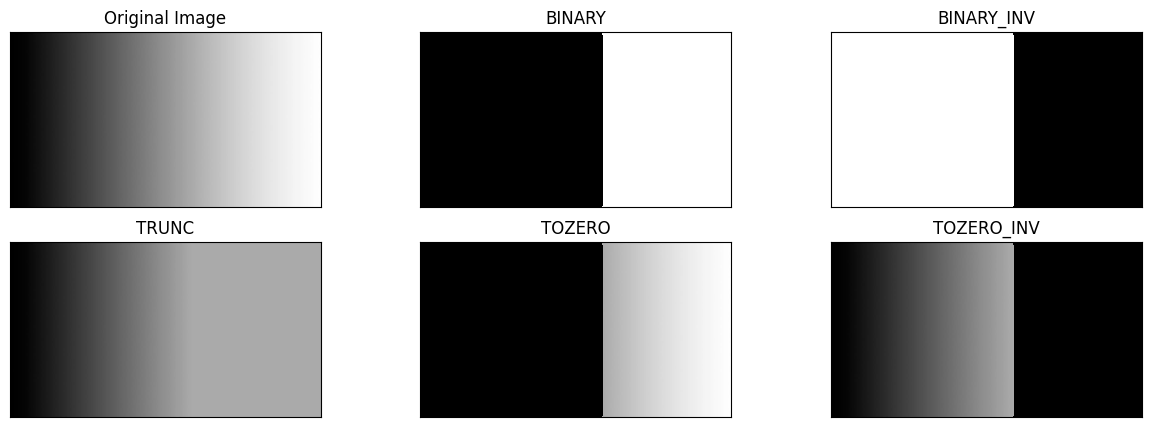

In [21]:
# Load gambar
filename = ('/content/gradient.jpg')
img = cv.imread(filename)

thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Penerapan Otsu's Thresholding Tanpa Menggunakan Library pada Gambar KTP

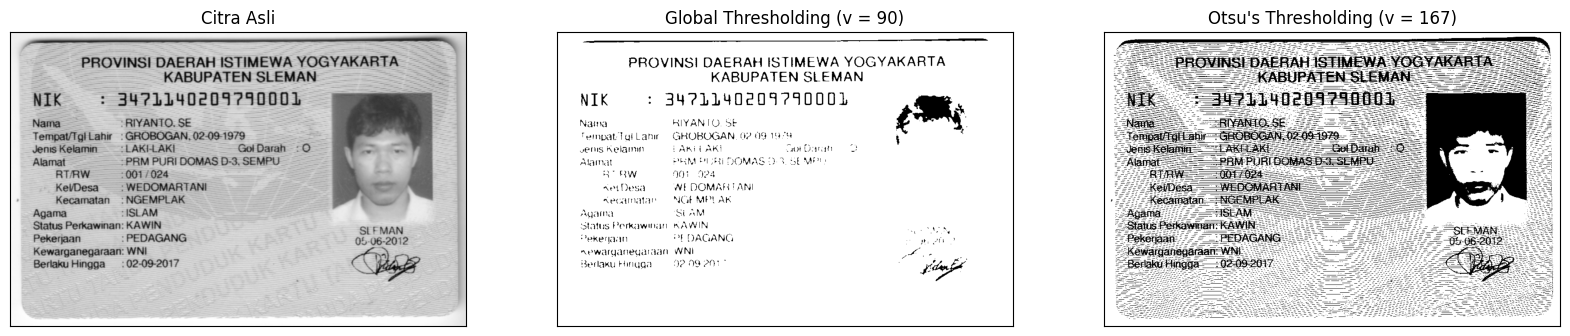

In [23]:
# Load gambar
filename = ('/content/ktp.png')
img = cv.imread(filename, 0)

# Terapkan Gaussian blur pada gambar
blur = cv.GaussianBlur(img, (5, 5), 0)

# Tentukan fungsi untuk threshold Otsu
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    hist, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]:  # Rentang ini dari 1 hingga 254 (rentang uint8)
        pcb = np.sum(hist[:t])
        pcf = np.sum(hist[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * hist[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * hist[t:]) / float(pcf)
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

# Terapkan thresholding Otsu
otsu_binarized, otsu_thresh = otsu(img)

# Tentukan judul untuk gambar hasil thresholding Otsu
otsu_title = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"

# Terapkan thresholding global dengan nilai ambang tetap
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)

# Buat daftar gambar dan judulnya untuk ditampilkan
titles = ['Citra Asli', 'Global Thresholding (v = 90)', otsu_title]
images = [blur, th1, otsu_binarized]

# Tampilkan gambar
plt.figure(figsize=(20, 15))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Pembuatan Histogram pada Foreground Citra Tersegmentasi Menggunakan cv.calcHist pada Gambar

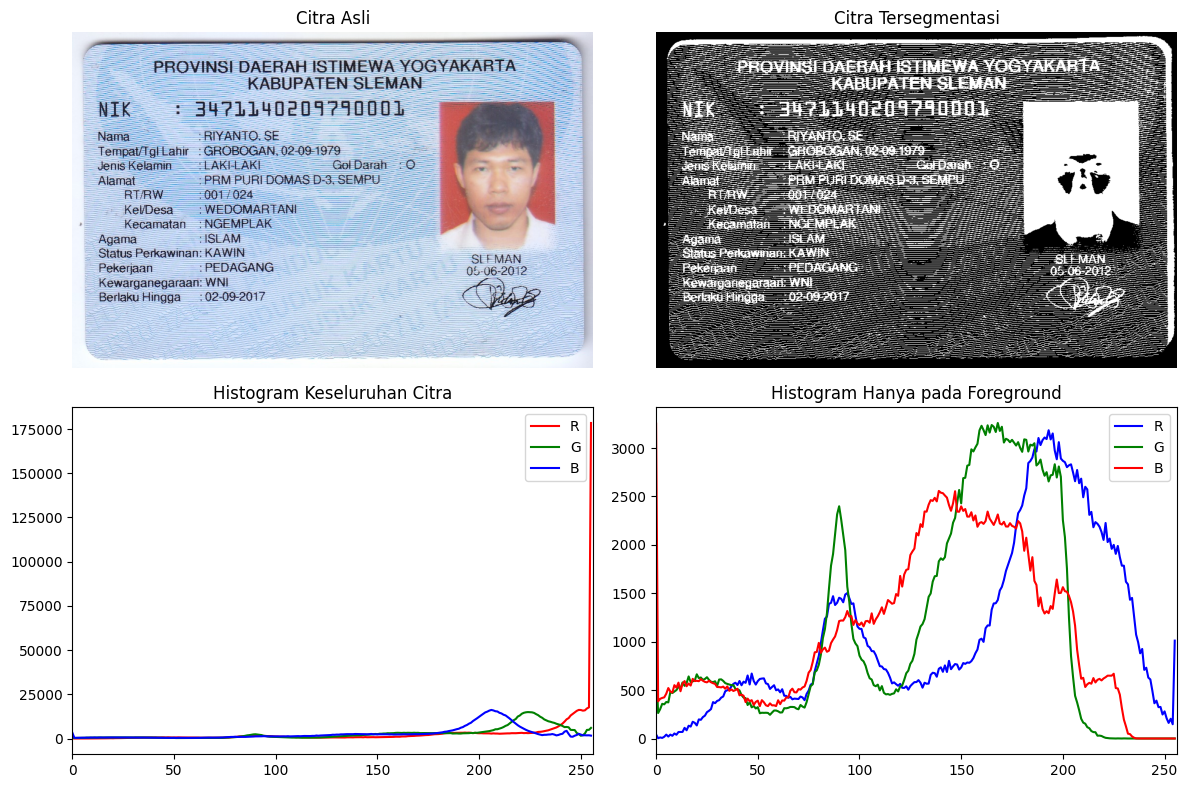

In [24]:
# Load gambar
img = cv.imread('/content/ktp.png', cv.IMREAD_COLOR)

# Ubah ke grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menerapkan threshold untuk mendapatkan citra tersegmentasi
_, thresholded = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY_INV)

# Buat mask untuk citra tersegmentasi
mask = np.zeros(gray_img.shape, dtype=np.uint8)
mask[thresholded == 255] = 255

# Hitung histogram citra asli untuk setiap saluran warna
hist_full_r = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_b = cv.calcHist([img], [2], None, [256], [0, 256])

# Hitung histogram citra tersegmentasi untuk setiap saluran warna
hist_segmented_r = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_segmented_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_segmented_b = cv.calcHist([img], [2], mask, [256], [0, 256])

# Tampilkan gambar dan histogram
plt.figure(figsize=(12, 8))

# Tampilkan citra asli dan citra tersegmentasi
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Tersegmentasi')
plt.axis('off')

# Tampilkan histogram keseluruhan citra untuk setiap saluran warna
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='red')
plt.plot(hist_full_g, color='green')
plt.plot(hist_full_b, color='blue')
plt.title('Histogram Keseluruhan Citra')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Tampilkan histogram hanya pada foreground untuk setiap saluran warna
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_r, color='blue')
plt.plot(hist_segmented_g, color='green')
plt.plot(hist_segmented_b, color='red')
plt.title('Histogram Hanya pada Foreground')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Atur tata letak plot
plt.tight_layout()

# Tampilkan plot
plt.show()

Segmentasi Warna Biru Menggunakan K-Means pada Gambar KTP

(<Axes: >, <matplotlib.image.AxesImage at 0x7f3f643bd000>)

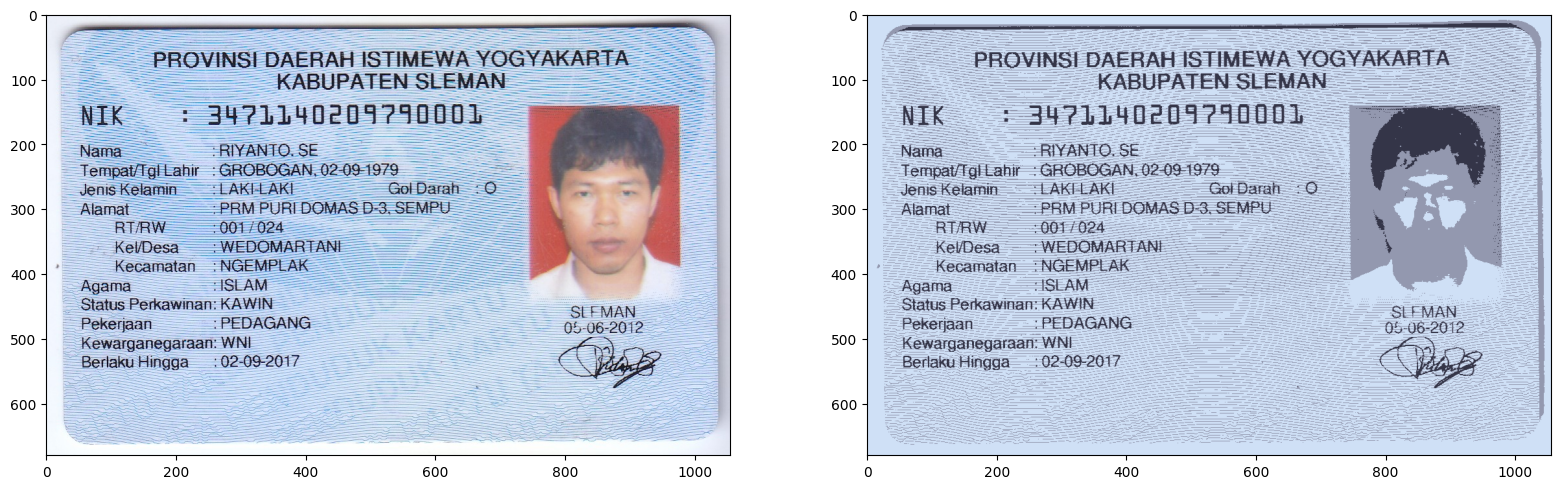

In [30]:
# Load gambar dalam mode warna RGB
img = cv.imread('/content/ktp.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mereshape gambar menjadi array 2D dari piksel
pixels = img.reshape((-1, 3))

# Mengonversi ke tipe data floating point
pixels = np.float32(pixels)

# Menentukan kriteria dan menerapkan kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mengonversi kembali ke nilai 8 bit
centers = np.uint8(centers)

# Memetakan label-label ke pusat-pusatnya
segmented_image = centers[labels.flatten()]

# Mereshape kembali menjadi gambar asli
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize=(30,30))
plt.subplot(1,3,1),plt.imshow(img)

plt.subplot(1,3,2),plt.imshow(segmented_image)

Text(0.5, 1.0, 'Hasil Segmentasi')

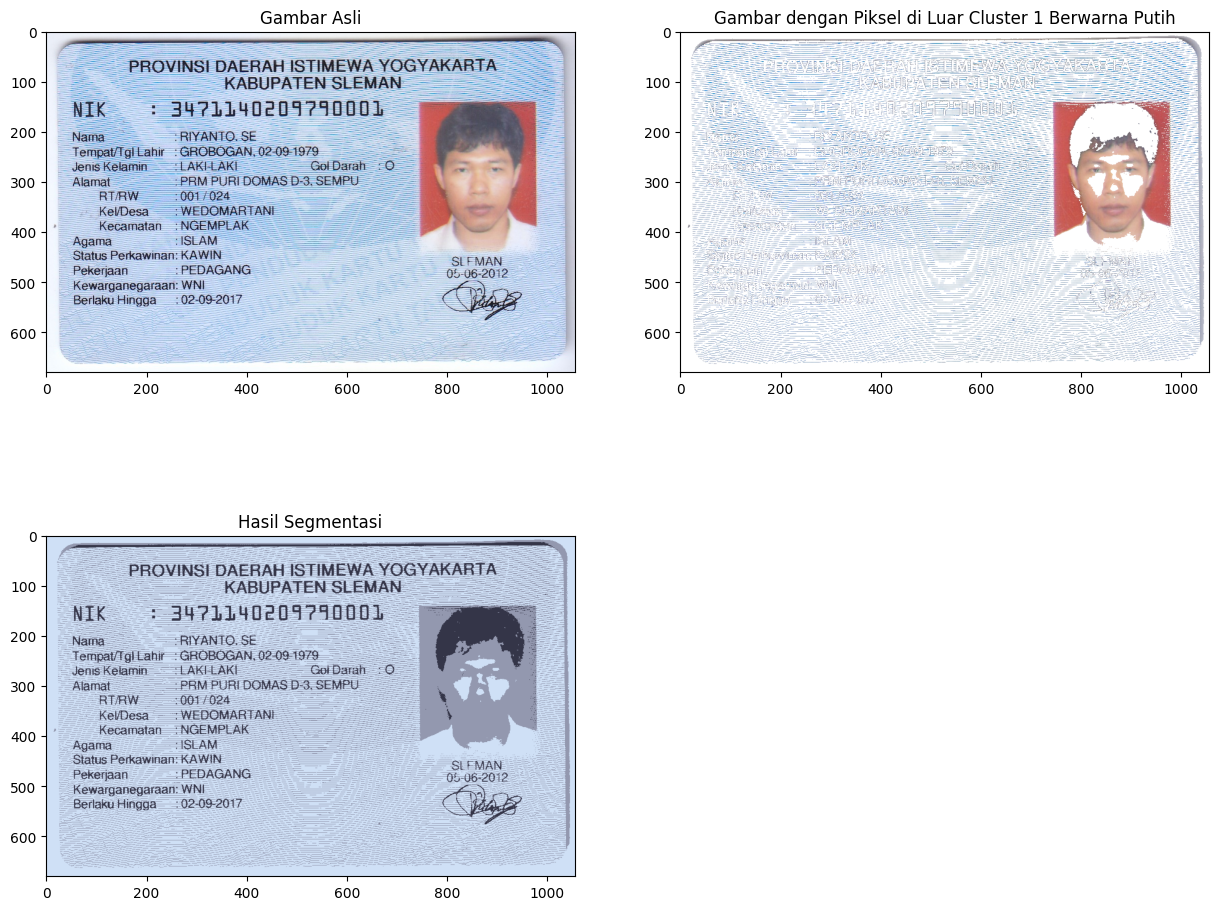

In [56]:
# Load gambar
filename = ('/content/ktp.png')
img = cv.imread(filename)
# Mengubah mode warna gambar ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mereshape array piksel ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# Konversi piksel ke tipe data floating point
pixel_values = np.float32(pixel_values)

# Menentukan kriteria berhenti iterasi K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

# Jumlah cluster yang akan digunakan
k = 3
# Melakukan K-Means clustering pada piksel
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Konversi posisi centroid ke tipe data integer
centers = np.uint8(centers)
# Melakukan flattening pada label array
labels = labels.flatten()
# Mengganti warna piksel asli dengan warna dari centroid
segmented_image = centers[labels.flatten()]
# Mereshape hasil segmentasi ke bentuk gambar asli
segmented_image = segmented_image.reshape(img.shape)

# Membuat salinan gambar asli
masked_image = np.copy(img)
# Membuat salinan array piksel
masked_image0 = masked_image.reshape((-1, 3))
# Mengganti warna piksel di luar cluster 1 menjadi putih
masked_image0[labels != 1] = [255, 255, 255]
# Mereshape hasilnya ke bentuk gambar
masked_image0 = masked_image0.reshape(img.shape)

# Menampilkan gambar asli dan hasil segmentasi dalam satu tampilan
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title("Gambar Asli")
plt.subplot(2, 2, 2), plt.imshow(masked_image0)
plt.title("Gambar dengan Piksel di Luar Cluster 1 Berwarna Putih")
plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title("Hasil Segmentasi")

Proses konversi gambar KTP menjadi teks yang dapat mengenali
tulisan

In [68]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

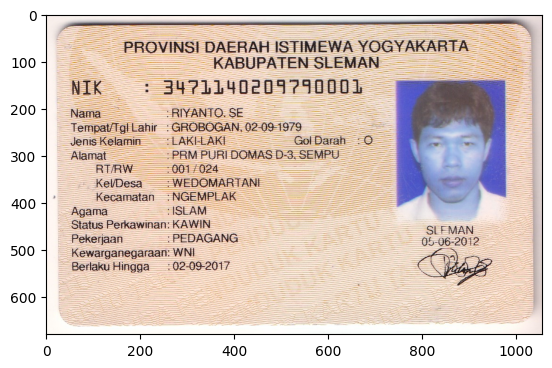

In [75]:
# Load the image
img = cv.imread('/content/ktp.png', cv.IMREAD_COLOR)
plt.imshow(img)

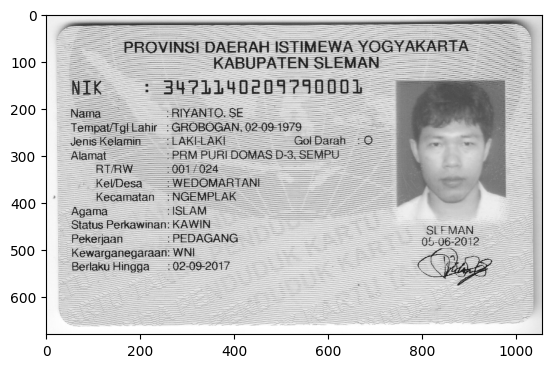

In [71]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [72]:
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)

In [73]:
d = pytesseract.image_to_data(img, lang='ind')

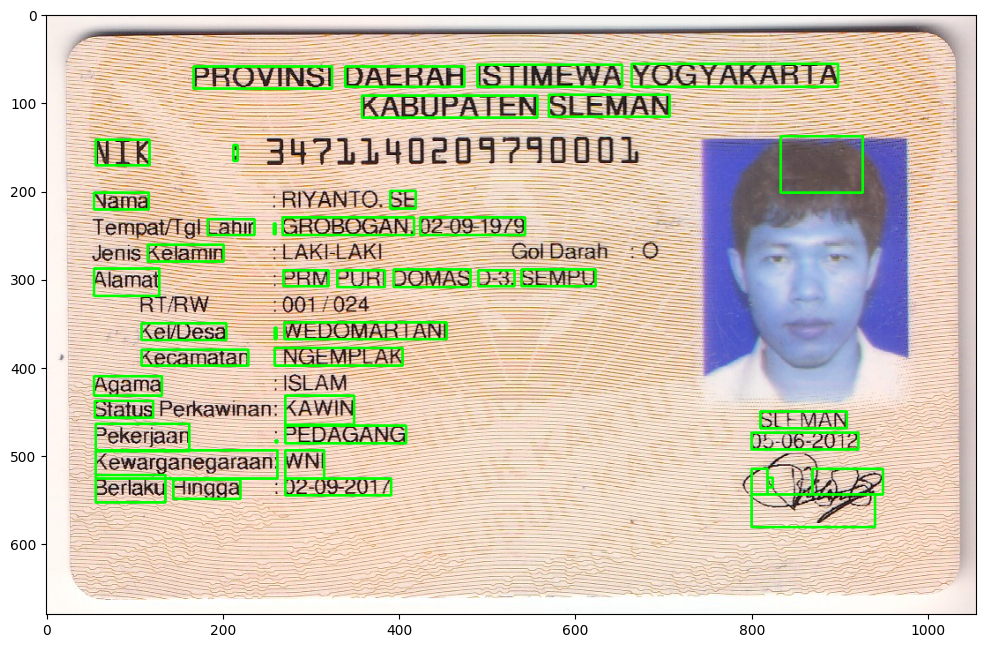

In [77]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

In [78]:
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 

